## Семинар 4: "Сверточные сети"

ФИО: Кафанов Олег Игоревич

In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split
import torch
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
%matplotlib inline

/home/fox/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Часть 1: Свертка

#### Одномерные сигналы
Начнем с одномерных сигналов — например, это могут быть различные временные ряды. 

<i>1.1 Реализуйте функцию, вычисляющую одномерную свертку.</i>

In [2]:
def t_convolve(signal, kernel):
    signal_convolved = np.zeros(len(signal)-len(kernel)+1)
    # 1. не забудьте перевернуть ядро!
    # 2. необходимо реализовать свертку без отступов, т.е. 
    #   размер результирующего сигнала должен быть меньше входного.
    for i in range(len(signal_convolved)):
        signal_convolved[i] = sum(kernel[::-1] * signal[i:i+len(kernel)])
        
    return signal_convolved

Проверим правильность реализации, сравнив с реализацией из scipy

In [3]:
from scipy.signal import convolve

signal = np.random.rand(100)
kernel = np.random.rand(5)
t_result = t_convolve(signal, kernel)
b_result = convolve(signal, kernel, mode='valid')

np.testing.assert_allclose(t_result, b_result)

Посмотрим как операция свертки может помочь нам убрать шум из сигнала

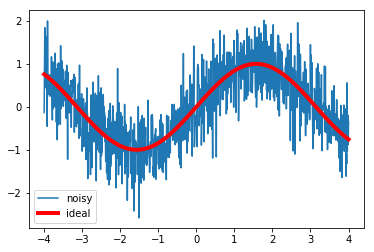

In [4]:
x = np.linspace(-4, 4, 1000)
signal = np.sin(x)
noisy_signal = signal + np.random.randn(signal.shape[0])*0.5
plt.plot(x, noisy_signal, label='noisy')
plt.plot(x, signal, 'r', label='ideal', linewidth=4)
plt.legend(loc=0)

Для подавления шума можно использовать усреднение значений сигнала в окрестности каждой точки (см. ЗБЧ). Вы можете убедиться, что такая операция может быть реализована при помощи свертки данных с ядром, $[\frac 1w, \frac 1w, ..., \frac 1w]$, где $w$ — размер окна.

<i>1.2  Вычислите свертку сигнала с ядром $[0.2, 0.2, 0.2, 0.2, 0.2]$ </i>

In [5]:
kernel = np.array([0.2]*5)
denoised_signal = t_convolve(noisy_signal, kernel)### YOUR CODE HERE #####

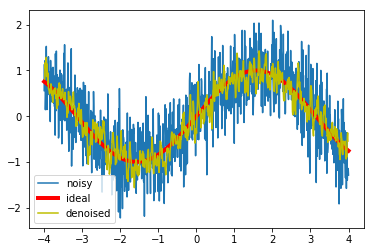

In [6]:
x = np.linspace(-4, 4, 1000)
signal = np.sin(x)
noisy_signal = signal + np.random.randn(signal.shape[0])*0.5
plt.plot(x, noisy_signal, label='noisy')
plt.plot(x, signal, 'r', label='ideal', linewidth=4)
plt.plot(x[len(kernel)//2:-(len(kernel)//2)], denoised_signal, 'y', label='denoised')
plt.legend(loc=0)

Заметим, что уровень шума значительно снизился! Попробуйте подобрать такую ширину окна, чтобы востановленный сигнал был наиболее похож на исходный.

<i> 1.3 Подберите размер окна <i>

In [15]:
w = 99
kernel = np.array([1./w]*w)
denoised_signal = t_convolve(noisy_signal, kernel)

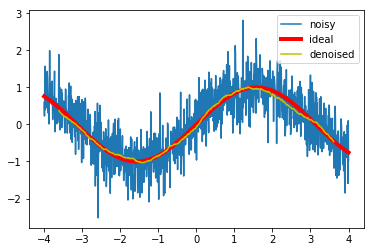

In [16]:
x = np.linspace(-4, 4, 1000)
signal = np.sin(x)
noisy_signal = signal + np.random.randn(signal.shape[0])*0.5
plt.plot(x, noisy_signal, label='noisy')
plt.plot(x, signal, 'r', label='ideal', linewidth=4)
plt.plot(x[len(kernel)//2:-(len(kernel)//2)], denoised_signal, 'y', label='denoised')
plt.legend(loc=0)

#### Многомерные сигналы
Перейдем теперь к черно-белым и цветным изображениям. Для ЧБ изображений имеем двумерный сигнал, для цветных — трехмерный (высота x ширина x каналы).

Для цветных изображений количество каналов ядра обычно совпадает с количеством каналов изображения. Таким образом, в результате получается черно-белое изображение.

<i>Для вычисления многомерных сверток используйте функцию convolve из from scipy.signal import convolve</i>

In [17]:
image = plt.imread('Masterobiwan.jpg')

<i>1.4 Найдите в вашей любимой поисковой системе веса каналов для перевода цветного изображения в черно-белое. Постройте фильтр, который будет переводить цветное изображение в ЧБ</i>

In [49]:
color_to_bw = np.array([[[0.114,0.587,0.299]]])

<i>1.5 На примере любого цветного изображения покажите результат его свертки с фильтром из предыдущего задания.</i>

In [28]:
from scipy.signal import convolve

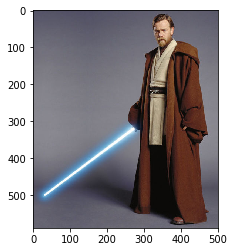

In [29]:
plt.imshow(image)

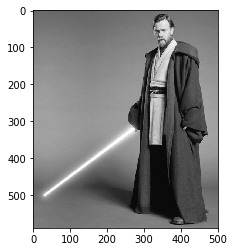

In [50]:
bw_image = convolve(color_to_bw, image, mode='valid').reshape(image.shape[0],image.shape[1])##### YOUR CODE HERE #####
# Не забудьте, что размер bw_image должен быть [w,h], а convolve вам вернет [w,h,1]
plt.imshow(bw_image, cmap=plt.cm.Greys_r)

Операция свертки также позволяет находить границы на изображении. Для этого можно использовать, например, фильтр Собеля.

<i>1.6 Задайте ядро фильтра Собеля и продемонстрируйте результат его применения к любому цветному изображению.</i>

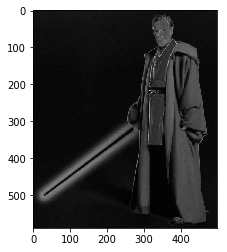

In [60]:
sobel_x = np.array([[[-1,-2,-1],[0,0,0],[1,2,1]]])
sobel_y = np.array([[[-1,0,1],[-2,0,2],[-1,0,1]]])

sobel_x_img = convolve(sobel_x, image, mode='valid')
sobel_y_img = convolve(sobel_y, image, mode='valid')

sobel_img = np.sqrt(sobel_x_img**2 + sobel_y_img**2)
sobel_img = sobel_img.reshape(sobel_img.shape[0], sobel_img.shape[1])
plt.imshow(sobel_img, cmap='gray')

трехмерная свертка по Z

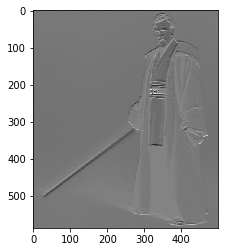

In [51]:
sobel = np.array([[[1,2,1],[2,4,2],[1,2,1]], [[0,0,0],[0,0,0],[0,0,0]], [[-1,-2,-1],[-2,-4,-2],[-1,-2,-4]]])
sobel_img = convolve(sobel, image, mode='valid')
sobel_img = sobel_img.reshape(sobel_img.shape[0], sobel_img.shape[1])
plt.imshow(sobel_img, cmap='gray')

В сверточных нейронных сетях каждый слой использует несколько фильтров. Допустим, у нас было изображение с тремя каналами (количество входных каналов). Рассмотрим банк из четырех фильтров (количество выходных каналов). Тогда изначально будет вычислена свертка с каждым фильтром — получим 4 ЧБ изображения. Теперь соединим их в одно, интерпретируя каждое ЧБ изображение как канал цветного: RGB$\alpha$.

<i>1.7 Реализуйте операцию свертки с банком фильтров (filter bank).</i>

In [216]:
def t_convolve_bank(signal, kernels):
    #assert signal.ndim == kernels.ndim - 1
    img_list = []
    for kernel in kernels:
        img_list += [convolve(kernel, signal, mode='valid')]
    return np.concatenate(img_list, axis=2)

<i>1.8 Задайте банк фильтров, меняющий порядок следования каналов с RGB на BGR.</i>

In [220]:
bank = [np.array([[[1,0,0]]]), np.array([[[0,1,0]]]), np.array([[[0,0,1]]])]

<i>1.9 Продемонстрируйте результат свертки любого цветного изображения с банком фильтров из предыдущего пункта.</i>

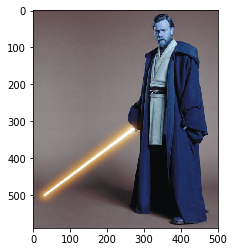

In [222]:
img_bank_bgr = t_convolve_bank(image, bank)
plt.imshow(img_bank_bgr.astype('uint8'))
# Не забудьте, что после свертки вы скорее всего получите тензор типа float. 
# Чтобы imshow нормально отобразил результат, надо привести его к типу uint8 (нпр., при помощи .astype('uint8'))

В процессе обучения сверточных нейронных сетей настраиваются веса элементов фильтр банка. Это позволяет не заниматься подбором коэффициентов "руками", а задавать лишь размер ядра: ширину, высоту, количество входных и выходных каналов. В итоге получаем четырехмерный массив (тензор).

### Часть 2: Пулинг

При использовании сверточных слоев принято использовать слои пулинга. Эта операция позволяет уменьшить пространственные размерности изображения и избавиться от избыточности.

<i>2.1 Реализуйте операции пулинга для цветных изображений</i>

In [554]:
def maxpool(image, pool):
    assert(image.ndim == 3)
    image_list = []
    M, N = image[...,0].shape
    K = pool[0]
    L = pool[1]

    MK = M // K
    NL = N // L

    for i in range(3):
        image_ = image[...,i][:MK*K, :NL*L].reshape(MK, K, NL, L).max(axis=(1, 3))
        image_list += [image_.reshape(image_.shape[0], image_.shape[1], 1)]
        
    return np.concatenate(image_list, axis=2)
    
            
def medianpool(image, pool):
    assert(image.ndim == 3)
    image_list = []
    M, N = image[...,0].shape
    K = pool[0]
    L = pool[1]

    MK = M // K
    NL = N // L

    for i in range(3):
        image_ = np.median(image[...,i][:MK*K, :NL*L].reshape(MK, K, NL, L), axis=(1, 3))
        image_list += [image_.reshape(image_.shape[0], image_.shape[1], 1)]
        
    return np.concatenate(image_list, axis=2).astype('uint8')


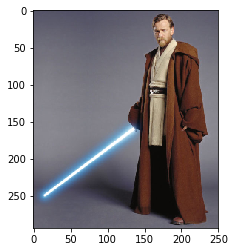

In [551]:
plt.imshow(maxpool(image, (2,2)))

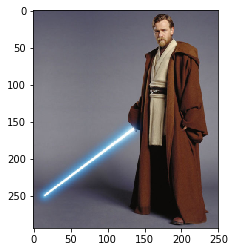

In [555]:
plt.imshow(medianpool(image, (2,2)))

Как и в первой части, посмотрим сначала как эта опреация влияет на цветные изображения.

<i>2.2 Взять цветное изображение и добавить к нему <a href="https://ru.wikipedia.org/wiki/Salt_and_pepper"> шум соль и перец</a>. Применить медианный пулинг и максимальный пулинг.</i>

In [532]:
def make_nose(image):
    salt = np.where(np.random.randn(image[:,:,0].ravel().shape[0]).reshape(image[:,:,0].shape) > 2, 1, 0)
    pepper = np.where(np.random.randn(image[:,:,0].ravel().shape[0]).reshape(image[:,:,0].shape) > 2, 1, 0)
    img_list = []
    for i in range(3):
        img = image[:,:,i] * ((salt - 1) * -1)  + salt * (255)
        img = img * ((pepper - 1) * -1)  
        img_list += [img.reshape(image[:,:,0].shape[0],image[:,:,0].shape[1],1)]
    return np.concatenate(img_list, axis=2).astype('uint8')   

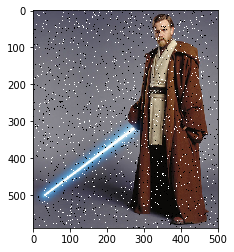

In [533]:
plt.imshow(make_nose(image))

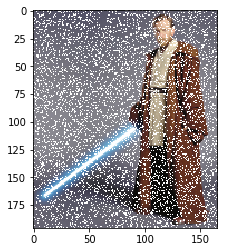

In [559]:
plt.imshow(maxpool(make_nose(image), (3,3)))

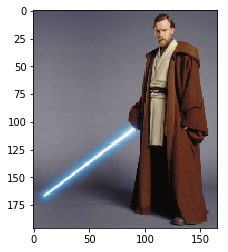

In [560]:
plt.imshow(medianpool(make_nose(image), (3,3)))

<i>2.3 Какой тип пулинга лучше справился с поставленной задачей? Почему?</i>

Медианный, потому что черный и белый цвета - минимум и максимум. Максимальный пуллинг из всех выбирает шум, а медианный выбирает самое характерное значение.

### Часть 3: Сверточная сеть на pyTorch

pyTorch предоставляет модули свертки и пулинга. Попробуем построить сеть и натренировать ее на данных MNIST. Для загрузки данных воспользуйтесь кодом со второго семинара.

Воспользуемся кодом с предыдущего семинара, чтобы обучить сверточную сеть на данных MNIST. Попробуем две архитектуры: 
2. input -> 8 conv 3x3 -> ReLU -> maxpool -> 16 conv 3x3 -> ReLU -> ravel -> linear -> softmax
1. input -> 8 conv 3x3 -> ReLU -> 16 conv 3x3 -> ReLU -> maxpool -> 32 conv 3x3 -> ravel -> linear -> softmax

Здесь запись "c conv KxK" означает то, что на выходе должно получиться c каналов, а размер ядра — KxK

Ниже приведен пример сети. <i>(Документация: http://pytorch.org/docs/)</i>

In [273]:
to_numpy = lambda x: x.numpy()
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

Processing...
Done!


In [641]:
X_train = []
y_train = []
for X, y in train_loader:
    #X = X.view(X.size(0), -1)
    X_train += [X] 
    y_train += [y]

In [904]:
images_train = torch.cat(X_train)
labels_train = torch.cat(y_train)

In [582]:
X_test = []
y_test = []
for X, y in test_loader:
    #X = X.view(X.size(0), -1)
    X_test += [X] 
    y_test += [y]

In [665]:
images_test = torch.cat(X_test)
labels_test = torch.cat(y_test)

In [584]:
image_size = images_train.shape[2]
channels = images_train.shape[1]

In [903]:
def shuffle_tensor (tensor1, tensor2):
    shuffle_indexes = torch.randperm(tensor1.shape[0])
    
    return tensor1[shuffle_indexes,...], tensor2[shuffle_indexes]

<i>3.1 Обучите сверточные сети с архитектурами (1) и (2). Какое качество удалось получить на тестовой выборке? Какой результат получался на полносвязной нейронной сети?</i>

## 1

In [912]:
class myConvNet(nn.Module):
    def __init__(self, modules):
        super(myConvNet, self).__init__()
        self.conv_layers = modules
        self.linear_layers = nn.Sequential(nn.Linear(image_size/2*image_size/6-1, 10), nn.LogSoftmax())
        #self.conv_layers = modules.cuda()
        #self.linear_layers.cuda()
        
    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [913]:
network = myConvNet(nn.Sequential(nn.Conv2d(channels, 8, 3, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2), 
                                         nn.Conv2d(8, 16, 3, 3, padding=1),nn.ReLU()))
batch_size = 10
loss_fn = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(network.parameters(), lr=0.001) 
loss_list = []
n_epoch = 5

#images_train = images_train.type(torch.cuda.FloatTensor)
#labels_train = labels_train.type(torch.cuda.FloatTensor)

for epoch in range(n_epoch):
    print 'EPOCH', epoch
    for i in range(len(images_train)/10 - 1):        
        X = Variable(images_train[i*batch_size:(i+1)*batch_size])
        y = Variable(labels_train[i*batch_size:(i+1)*batch_size], requires_grad=False)
        output = network.forward(X)

        loss = loss_fn(output, y)
        loss_list += [loss.data.mean()]
        if i%1000 == 0:
            print 'Current loss:', loss.data[0]

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    images_train, labels_train = shuffle_tensor(images_train, labels_train)

EPOCH 0
Current loss: 2.31146931648
Current loss: 0.225637361407
Current loss: 1.24300658703
Current loss: 0.557192802429
Current loss: 0.179929882288
Current loss: 0.0506401769817
EPOCH 1
Current loss: 0.51984089613
Current loss: 0.654307961464
Current loss: 0.371412873268
Current loss: 0.11072794348
Current loss: 0.452176749706
Current loss: 0.264435112476
EPOCH 2
Current loss: 0.269970118999
Current loss: 0.0189624018967
Current loss: 0.345763534307
Current loss: 0.15183506906
Current loss: 0.192486077547
Current loss: 0.129275768995
EPOCH 3
Current loss: 0.00940684322268
Current loss: 0.116499640048
Current loss: 0.0493305921555
Current loss: 0.259945273399
Current loss: 0.0376169085503
Current loss: 0.270325928926
EPOCH 4
Current loss: 0.584460735321
Current loss: 0.0712461769581
Current loss: 0.0920082256198
Current loss: 0.0519356019795
Current loss: 0.223391741514
Current loss: 0.240624219179


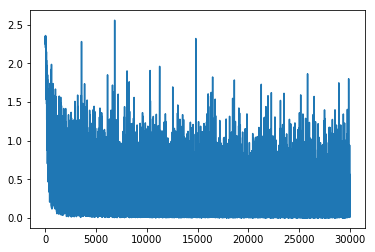

In [914]:
plt.plot(loss_list)
plt.show()

In [915]:
y_pred = network.forward(Variable(images_test)).data.numpy().argmax(axis=1)

In [917]:
j = 0
for i in (labels_test.numpy() - y_pred):
    if i:
        j += 1
print 1 - j/10000., j

0.9497 503


## 2

In [924]:
class myConvNet(nn.Module):
    def __init__(self, modules):
        super(myConvNet, self).__init__()
        self.conv_layers = modules
        self.linear_layers = nn.Sequential(nn.Linear(image_size/2*image_size/12, 10), nn.LogSoftmax())
        #self.conv_layers = modules.cuda()
        #self.linear_layers.cuda()
        
    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [926]:
network = myConvNet(nn.Sequential(nn.Conv2d(channels, 8, 3, 3, padding=1), nn.ReLU(), nn.Conv2d(8, 16, 3, 3, padding=1), 
                                  nn.ReLU(), nn.MaxPool2d(2), nn.Conv2d(16, 32, 3, 3, padding=1)))

batch_size = 10
loss_fn = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(network.parameters(), lr=0.001) 
loss_list = []
n_epoch = 5

for epoch in range(n_epoch):
    print 'EPOCH', epoch
    for i in range(len(images_train)/10 - 1):        
        X = Variable(images_train[i*batch_size:(i+1)*batch_size])
        y = Variable(labels_train[i*batch_size:(i+1)*batch_size], requires_grad=False)
        output = network.forward(X)

        loss = loss_fn(output, y)
        loss_list += [loss.data.mean()]
        if i%1000 == 0:
            print 'Current loss:', loss.data[0]

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    images_train, labels_train = shuffle_tensor(images_train, labels_train)

EPOCH 0
Current loss: 2.40180182457
Current loss: 0.0719531401992
Current loss: 0.554348111153
Current loss: 0.0139108356088
Current loss: 0.584194660187
Current loss: 0.299239426851
EPOCH 1
Current loss: 0.0161386020482
Current loss: 0.0226867515594
Current loss: 0.0386367812753
Current loss: 0.120362900198
Current loss: 0.444214493036
Current loss: 0.108160734177
EPOCH 2
Current loss: 0.0138438716531
Current loss: 0.479353189468
Current loss: 0.00582258868963
Current loss: 0.115354582667
Current loss: 0.192002981901
Current loss: 0.20358030498
EPOCH 3
Current loss: 0.00426197517663
Current loss: 0.214782312512
Current loss: 0.00322484225035
Current loss: 0.54368776083
Current loss: 0.31511721015
Current loss: 0.00137598719448
EPOCH 4
Current loss: 0.00538317160681
Current loss: 0.0100308312103
Current loss: 0.30463424325
Current loss: 0.391506373882
Current loss: 0.260980039835
Current loss: 0.0595452897251


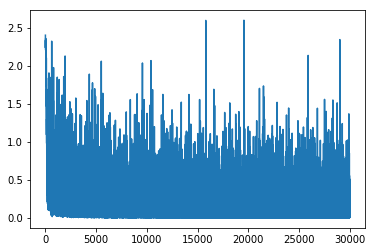

In [927]:
plt.plot(loss_list)
plt.show()

In [928]:
y_pred = network.forward(Variable(images_test)).data.numpy().argmax(axis=1)

In [929]:
j = 0
for i in (labels_test.numpy() - y_pred):
    if i:
        j += 1
print 1 - j/10000., j

0.964 360


<i>3.2 На каких объектах сеть ошибается сильнее всего?</i>

In [930]:
y_pred_10 = network.forward(Variable(images_test)).data.numpy()

In [931]:
y_pred_10.min()

-50.176193

In [932]:
miss = y_pred_10[[range(len(y_pred_10)), labels_test.numpy()]]

In [933]:
np.min(miss)

-11.597212

## 1

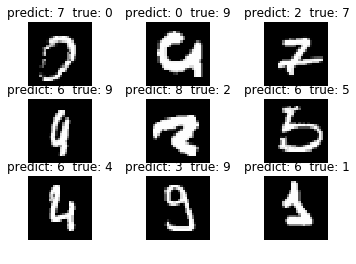

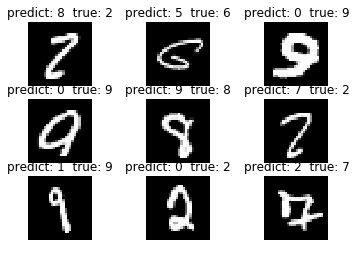

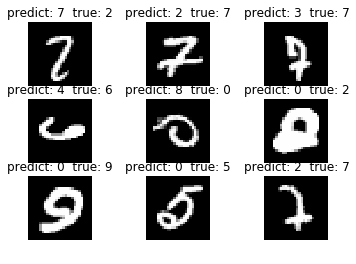

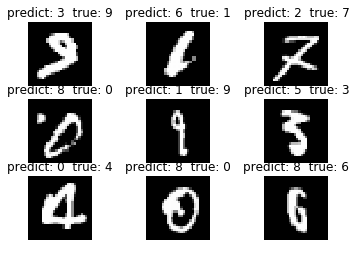

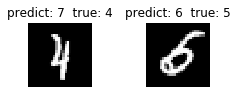

In [922]:
j = 1
for i in range(len(labels_test)):
    if labels_test.numpy()[i] - y_pred[i]:
        if miss[i] < -5:
            plt.subplot(3, 3, j)
            j += 1
            plt.imshow(images_test[i].numpy().reshape(28, 28), cmap=plt.cm.Greys_r)
            plt.title('predict: ' + str(y_pred[i]) + '  true: ' + str(labels_test[i]) )
            plt.axis('off')
            if j == 10:
                plt.show()
                j = 1

## 2

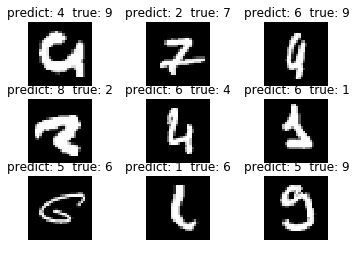

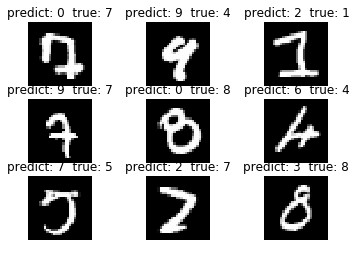

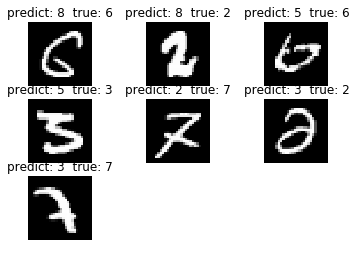

In [935]:
j = 1
for i in range(len(labels_test)):
    if labels_test.numpy()[i] - y_pred[i]:
        if miss[i] < -5:
            plt.subplot(3, 3, j)
            j += 1
            plt.imshow(images_test[i].numpy().reshape(28, 28), cmap=plt.cm.Greys_r)
            plt.title('predict: ' + str(y_pred[i]) + '  true: ' + str(labels_test[i]) )
            plt.axis('off')
            if j == 10:
                plt.show()
                j = 1

<i>3.3 Поэкспериментируйте с различными архитектурами сверточных сетей. Смогли ли вы улучшить результат на тестовой выборке?</i>

с ELU результат чуть лучше

In [957]:
class myConvNet(nn.Module):
    def __init__(self, modules):
        super(myConvNet, self).__init__()
        self.conv_layers = modules
        self.linear_layers = nn.Sequential(nn.Linear(image_size*image_size/24, 10), nn.LogSoftmax())
        #self.conv_layers = modules.cuda()
        #self.linear_layers.cuda()
        
    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [961]:
network = myConvNet(nn.Sequential(nn.Conv2d(channels, 8, 3, 3, padding=1), nn.ELU(), nn.Conv2d(8, 16, 3, 3, padding=1), 
                                  nn.ELU(), nn.MaxPool2d(2), nn.Conv2d(16, 32, 3, 3, padding=1)))
                                 #n.ReLU(), nn.MaxPool2d(2), nn.Conv2d(32, 16, 3, 3, padding=1)))

batch_size = 10
loss_fn = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(network.parameters(), lr=0.001) 
loss_list = []
n_epoch = 5

for epoch in range(n_epoch):
    print 'EPOCH', epoch
    for i in range(len(images_train)/10 - 1):        
        X = Variable(images_train[i*batch_size:(i+1)*batch_size])
        y = Variable(labels_train[i*batch_size:(i+1)*batch_size], requires_grad=False)
        output = network.forward(X)

        loss = loss_fn(output, y)
        loss_list += [loss.data.mean()]
        if i%1000 == 0:
            print 'Current loss:', loss.data[0]

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    images_train, labels_train = shuffle_tensor(images_train, labels_train)

EPOCH 0
Current loss: 2.25265598297
Current loss: 0.0721077546477
Current loss: 0.0782708078623
Current loss: 0.160843223333
Current loss: 0.0522253587842
Current loss: 0.0198433510959
EPOCH 1
Current loss: 0.0774781927466
Current loss: 0.313023149967
Current loss: 0.041961170733
Current loss: 0.0218725260347
Current loss: 0.0226788464934
Current loss: 0.127164810896
EPOCH 2
Current loss: 0.0630495175719
Current loss: 0.00775611680001
Current loss: 0.454734385014
Current loss: 0.00837166421115
Current loss: 0.16797247529
Current loss: 0.0217695720494
EPOCH 3
Current loss: 0.221384093165
Current loss: 0.0277842339128
Current loss: 0.0827279835939
Current loss: 0.329204142094
Current loss: 0.0150859924033
Current loss: 0.00989566091448
EPOCH 4
Current loss: 0.532235860825
Current loss: 0.00574411684647
Current loss: 0.162471160293
Current loss: 0.100649081171
Current loss: 0.0353951454163
Current loss: 0.0592910274863


In [962]:
y_pred = network.forward(Variable(images_test)).data.numpy().argmax(axis=1)
j = 0
for i in (labels_test.numpy() - y_pred):
    if i:
        j += 1
print 1 - j/10000., j

0.9653 347


In [963]:
y_pred_10 = network.forward(Variable(images_test)).data.numpy()

In [964]:
miss = y_pred_10[[range(len(y_pred_10)), labels_test.numpy()]]

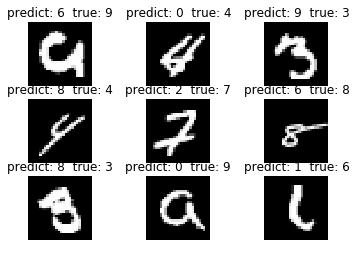

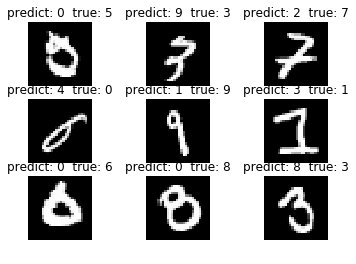

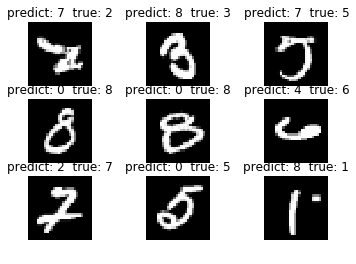

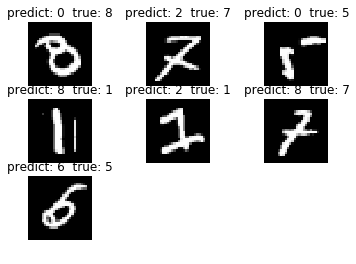

In [965]:
j = 1
for i in range(len(labels_test)):
    if labels_test.numpy()[i] - y_pred[i]:
        if miss[i] < -5:
            plt.subplot(3, 3, j)
            j += 1
            plt.imshow(images_test[i].numpy().reshape(28, 28), cmap=plt.cm.Greys_r)
            plt.title('predict: ' + str(y_pred[i]) + '  true: ' + str(labels_test[i]) )
            plt.axis('off')
            if j == 10:
                plt.show()
                j = 1

#### Feedback (опционально)

Здесь вы можете оставить список опечаток из лекции или семинара:

Здесь вы можете оставить комментарии по лекции или семинару: